### import the required libraries 

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore

**Reading the three files** into three separate DataFrames named `bm`, `sb`, `td` for `benin-malanville`,  `sierraleone-bumbuna`, `togo-dapaong_qc`, respectively.

In [151]:
# Load CSV files into DataFrames
bm = pd.read_csv("../data/benin-malanville.csv")
sb = pd.read_csv("../data/sierraleone-bumbuna.csv")
td = pd.read_csv("../data/togo-dapaong_qc.csv")

Inspect `bm`, `sb` and `td` by looking at its `shape`, `head` and `info`

In [153]:
print("shape of benin-malanville:", bm.shape)
print("shape of sierraleone-bumbuna:", sb.shape)
print("shape of togo-dapaong_qc:",td.shape)

shape of benin-malanville: (525600, 19)
shape of sierraleone-bumbuna: (525600, 19)
shape of togo-dapaong_qc: (525600, 19)


### all our data contain 525600 rows an 19 columns.

In [140]:
bm.head()

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [141]:
sb.head()

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
1  2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2  2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
3  2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
4  2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

   WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  \
0      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
1      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
2      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
3      0.0  0.0      0.0  1002         0            0.1   22.3   22.6   
4      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [142]:
td.head()

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1  2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2  2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3  2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4  2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4   
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4   
2      0.3  228.5      2.9  977         0            0.0   24.7   24.4   
3      0.3  229.1      4.6  977         0            0.0   24.7   24.4   
4      0.4  227.5      1.6  977         0            0.0   24.7   24.4   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [143]:
bm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

`Timestamp`: is Object data type, so should be converted to datetime.
`GHI`, `DNI`, `DHI`, `ModA`, `ModB`, `Tamb`, `RH`, `WS`, `WSgust`, `WSstdev`, `WD`, `WDstdev`, `Precipitation`, `TModA`, `TModB`: are all numeric data types, with no missing values.
`Cleaning` and `BP`: are integer data type, no missing values.
`Comments`:are float data type with all values NaN.

In [144]:
sb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

`Timestamp`: is Object data type, so should be converted to datetime.
`GHI`, `DNI`, `DHI`, `ModA`, `ModB`, `Tamb`, `RH`, `WS`, `WSgust`, `WSstdev`, `WD`, `WDstdev`, `Precipitation`, `TModA`, `TModB`: are all numeric data types, with no missing values.
`Cleaning` and `BP`: are integer data type, no missing values.
`Comments`:are float data type with all values NaN.

In [145]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

`Timestamp`: is Object data type, so should be converted to datetime.
`GHI`, `DNI`, `DHI`, `ModA`, `ModB`, `Tamb`, `RH`, `WS`, `WSgust`, `WSstdev`, `WD`, `WDstdev`, `Precipitation`, `TModA`, `TModB`: are all numeric data types, with no missing values.
`Cleaning` and `BP`: are integer data type, no missing values.
`Comments`:are float data type with all values NaN.

## Convert Timestamp to Datetime

In [146]:
bm['Timestamp'] = pd.to_datetime(bm['Timestamp'])

In [147]:
sb['Timestamp'] = pd.to_datetime(sb['Timestamp'])

In [148]:
td['Timestamp'] = pd.to_datetime(td['Timestamp'])

In [150]:
bm.set_index('Timestamp', inplace=True)
sb.set_index('Timestamp', inplace=True)
td.set_index('Timestamp', inplace=True)

KeyError: "None of ['Timestamp'] are in the columns"

In [131]:
summary_stats_bm = bm.describe()
summary_stats_bm

GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.200000      28.800000       1.000000   
50%         4.300000      28.000000      55.100000       1.900000   
75%       447.900000      32.300000      80.100000       3.100000   
max      1342.300000      43.800000     100.000000      19.500000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        2.809195       0.473390     153.435172       8.582407   
std         2.029120       0.273395     102.332842       6.385864   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.300000       0.400000      59.000000       3.700000   
50%         2.600000       0.500000     181.000000       8.600000   
75%         4.100000       0.600000     235.100000      12.300000   
max        26.600000       4.200000     360.000000      99.400000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      994.197199       0.000923       0.001905      35.246026   
std         2.474993       0.030363       0.037115      14.807258   
min       985.000000       0.000000       0.000000       9.000000   
25%       993.000000       0.000000       0.000000      24.200000   
50%       994.000000       0.000000       0.000000      30.000000   
75%       996.000000       0.000000       0.000000      46.900000   
max      1003.000000       1.000000       2.500000      81.000000   

               TModB  Comments  
count  525600.000000       0.0  
mean       32.471736       NaN  
std        12.348743       NaN  
min         8.100000       NaN  
25%        23.600000       NaN  
50%        28.900000       NaN  
75%        41.500000       NaN  
max        72.500000       NaN

In [132]:
summary_stats_sb = sb.describe()
summary_stats_sb

GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%         0.000000      23.100000      68.700000       0.000000   
50%         3.400000      25.300000      85.400000       0.800000   
75%       345.400000      29.400000      96.700000       2.000000   
max      1473.000000      39.900000     100.000000      19.200000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        1.691606       0.363823     133.044668       7.172220   
std         1.617053       0.295000     114.284792       7.535093   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         1.600000       0.400000     161.500000       6.200000   
75%         2.600000       0.600000     234.100000      12.000000   
max        23.900000       4.100000     360.000000      98.400000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      999.876469       0.000967       0.004806      32.504263   
std         2.104419       0.031074       0.047556      12.434899   
min       993.000000       0.000000       0.000000      10.700000   
25%       999.000000       0.000000       0.000000      23.500000   
50%      1000.000000       0.000000       0.000000      26.600000   
75%      1001.000000       0.000000       0.000000      40.900000   
max      1006.000000       1.000000       2.400000      72.800000   

               TModB  Comments  
count  525600.000000       0.0  
mean       32.593091       NaN  
std        12.009161       NaN  
min        11.100000       NaN  
25%        23.800000       NaN  
50%        26.900000       NaN  
75%        41.300000       NaN  
max        70.400000       NaN

In [133]:
summary_stats_td = td.describe()
summary_stats_td

GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         0.000000      24.200000      26.500000       1.400000   
50%         4.300000      27.200000      59.300000       2.200000   
75%       411.000000      31.100000      80.800000       3.200000   
max      1367.000000      41.400000      99.800000      16.100000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        3.229490       0.557740     161.741845      10.559568   
std         1.882565       0.268923      91.877217       5.915490   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.900000       0.400000      74.800000       6.900000   
50%         2.900000       0.500000     199.100000      10.800000   
75%         4.400000       0.700000     233.500000      14.100000   
max        23.100000       4.700000     360.000000      86.900000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      975.915242       0.000535       0.001382      32.444403   
std         2.153977       0.023116       0.026350      10.998334   
min       968.000000       0.000000       0.000000      13.100000   
25%       975.000000       0.000000       0.000000      23.900000   
50%       976.000000       0.000000       0.000000      28.400000   
75%       977.000000       0.000000       0.000000      40.600000   
max       983.000000       1.000000       2.300000      70.400000   

               TModB  Comments  
count  525600.000000       0.0  
mean       33.543330       NaN  
std        12.769277       NaN  
min        13.100000       NaN  
25%        23.600000       NaN  
50%        28.400000       NaN  
75%        43.000000       NaN  
max        94.600000       NaN

In [134]:
missing_values_bm = bm.isnull().sum()
print(missing_values_bm)

GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [135]:
missing_values_sb = sb.isnull().sum()
print(missing_values_sb)

GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [136]:
missing_values_td = td.isnull().sum()
print(missing_values_td)

GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


## Handle Comments Column
#### Since the `Comments` column has all missing values or NaN, it can be removed

In [137]:
bm.drop(columns=['Comments'], inplace=True)
sb.drop(columns=['Comments'], inplace=True)
td.drop(columns=['Comments'], inplace=True)

KeyError: "['Comments'] not found in axis"

now our data has 18 columns

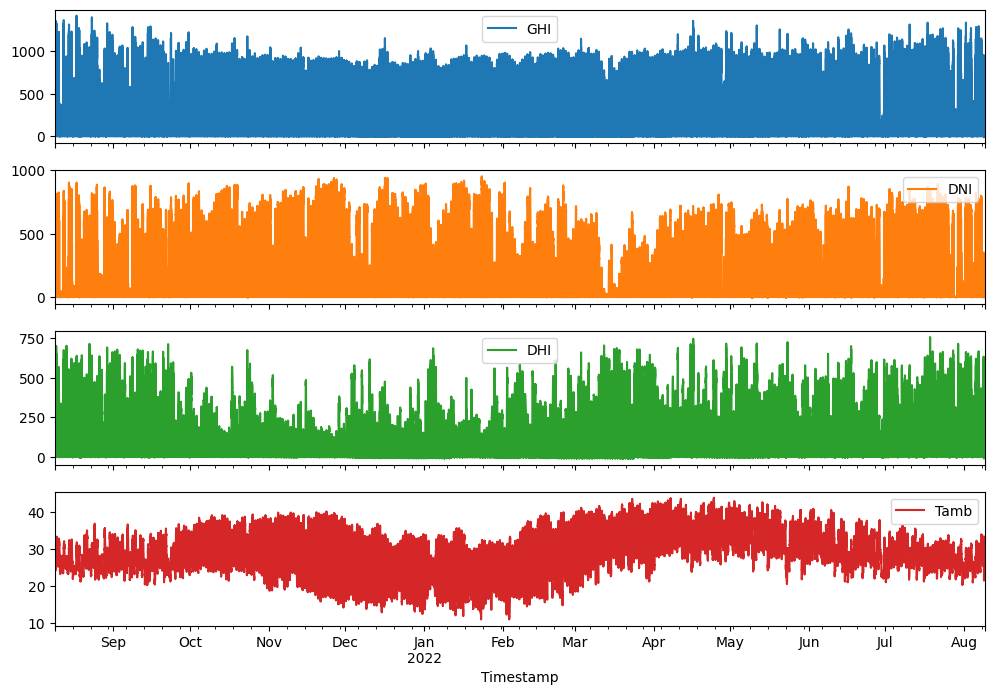

In [41]:
bm[['GHI', 'DNI', 'DHI', 'Tamb']].plot(subplots=True, figsize=(12, 8))
plt.show()

In [ ]:
sb[['GHI', 'DNI', 'DHI', 'Tamb']].plot(subplots=True, figsize=(12, 8))
plt.show()

In [ ]:
td[['GHI', 'DNI', 'DHI', 'Tamb']].plot(subplots=True, figsize=(12, 8))
plt.show()

#### Evaluate Impact of Cleaning

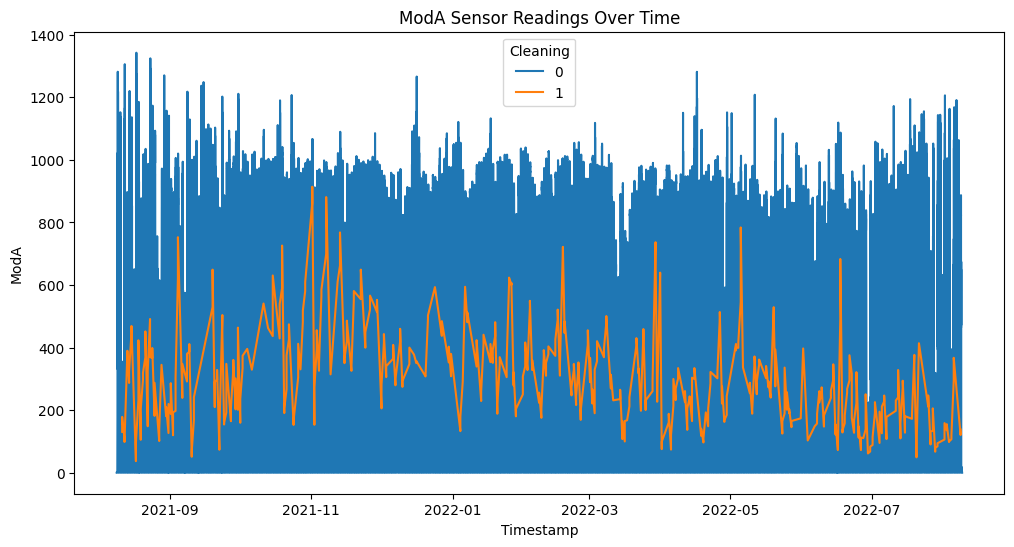

In [42]:
# Plot sensor readings over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=bm, x=bm.index, y='ModA', hue='Cleaning')
plt.title('ModA Sensor Readings Over Time')
plt.show()

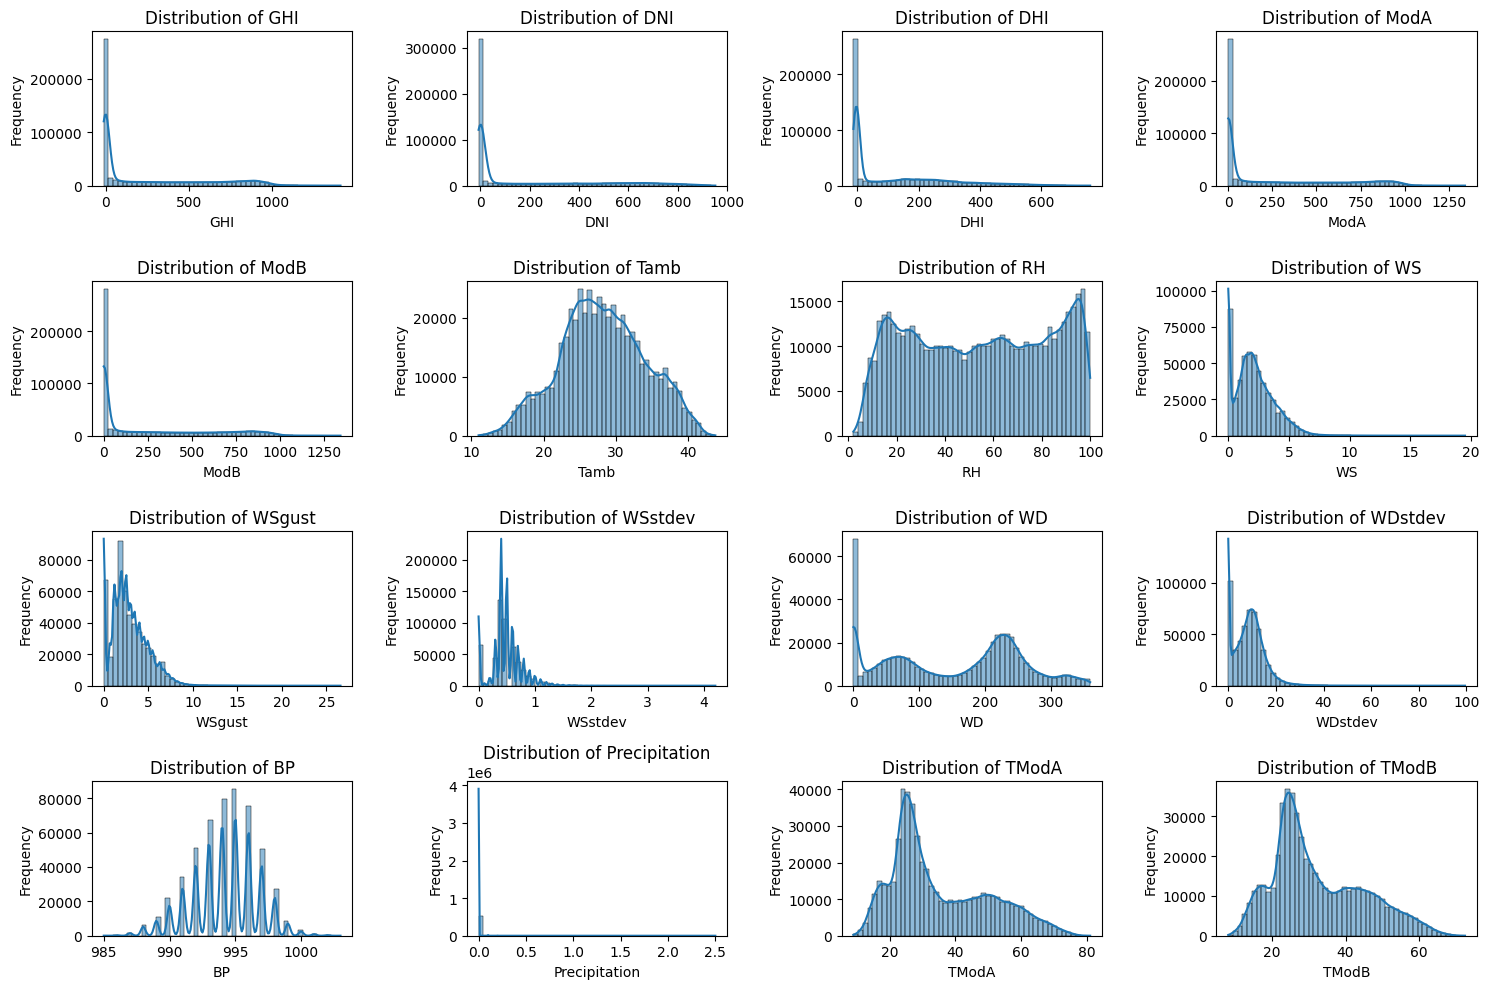

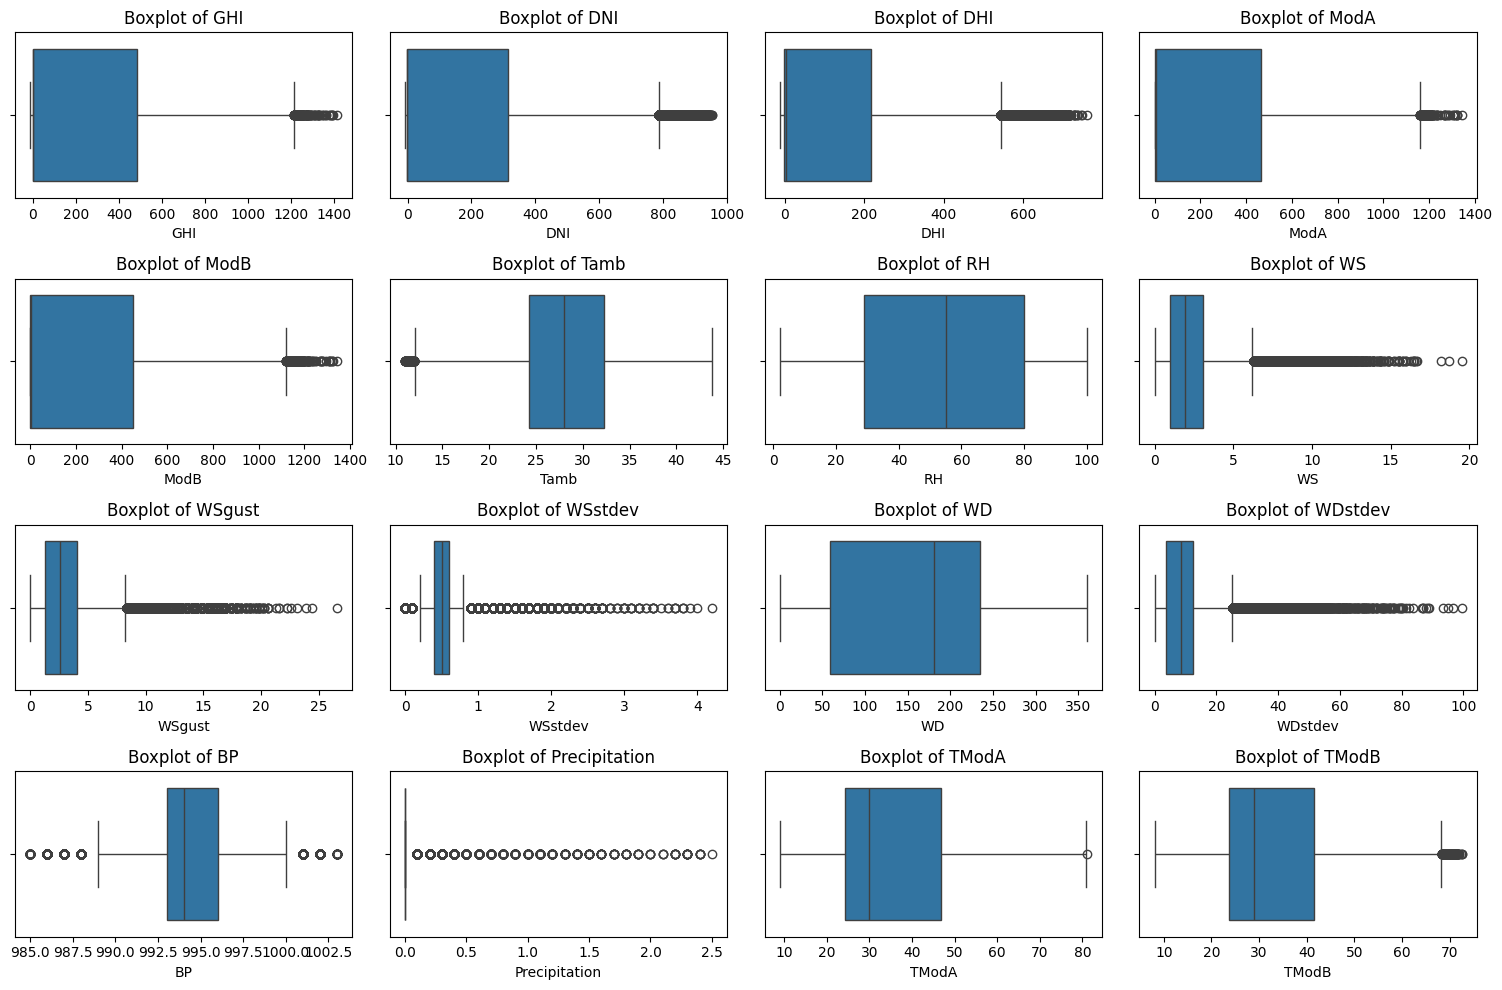

In [48]:
# Histograms
plt.figure(figsize=(15, 10))
columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Precipitation', 'TModA', 'TModB']
for i, col in enumerate(columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(bm[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=bm[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

Data Cleaning

In [51]:
# Check for negative values in columns where they are not expected
negative_values = bm[bm[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'BP', 'Precipitation', 'TModA', 'TModB']] < 0]
print(negative_values)


                     GHI  DNI  DHI  ModA  ModB  Tamb  RH  WS  WSgust  WSstdev  \
Timestamp                                                                       
2021-08-09 00:01:00 -1.2 -0.2 -1.1   NaN   NaN   NaN NaN NaN     NaN      NaN   
2021-08-09 00:02:00 -1.1 -0.2 -1.1   NaN   NaN   NaN NaN NaN     NaN      NaN   
2021-08-09 00:03:00 -1.1 -0.2 -1.1   NaN   NaN   NaN NaN NaN     NaN      NaN   
2021-08-09 00:04:00 -1.1 -0.1 -1.0   NaN   NaN   NaN NaN NaN     NaN      NaN   
2021-08-09 00:05:00 -1.0 -0.1 -1.0   NaN   NaN   NaN NaN NaN     NaN      NaN   
...                  ...  ...  ...   ...   ...   ...  ..  ..     ...      ...   
2022-08-08 23:56:00 -5.5 -0.1 -5.9   NaN   NaN   NaN NaN NaN     NaN      NaN   
2022-08-08 23:57:00 -5.5 -0.1 -5.8   NaN   NaN   NaN NaN NaN     NaN      NaN   
2022-08-08 23:58:00 -5.5 -0.1 -5.8   NaN   NaN   NaN NaN NaN     NaN      NaN   
2022-08-08 23:59:00 -5.5 -0.1 -5.8   NaN   NaN   NaN NaN NaN     NaN      NaN   
2022-08-09 00:00:00 -5.5 -0.

#### there are negative values in three columns where they are not expected.

**Expected behavior for each column**:

`GHI`, `DNI`, `DHI`: Should be non-negative as they represent solar irradiance.

`ModA`, `ModB`: Should be checked based on the specific domain knowledge.

`Tamb`: Ambient temperature should be a reasonable non-negative number.

`RH`: Relative humidity should be between 0 and 100.

`WS`, WSgust: Wind speed should be non-negative.

`WSstdev`: Should be non-negative as it represents standard deviation.

`BP`: Barometric pressure should be non-negative.

`Precipitation`: Should be non-negative.

`TModA`, `TModB`: Should be checked based on specific expectations.

GHI (Global Horizontal Irradiance), DNI (Direct Normal Irradiance), and DHI (Diffuse Horizontal Irradiance) cannot be negative values. These measurements represent the amount of solar radiation received per unit area, and they are physically constrained to be non-negative because they quantify energy, which cannot be negative.

They are likely due to **errors** in the measurement process or data processing issues, such as **incorrect calibration**, **sensor faults**, or **erroneous data entry**.

In [52]:
# Replace negative values with zero
bm['GHI'] = bm['GHI'].apply(lambda x: max(x, 0))
bm['DNI'] = bm['DNI'].apply(lambda x: max(x, 0))
bm['DHI'] = bm['DHI'].apply(lambda x: max(x, 0))


#### Checking for outliers


In [54]:
# Calculate Z-scores for the relevant columns
columns_of_interest = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev']
z_scores = bm[columns_of_interest].apply(zscore)

# Identify outliers (Z-scores > 3 or < -3)
outliers = ((z_scores > 3) | (z_scores < -3)).sum()
print("Outliers count per variable:\n", outliers)

Outliers count per variable:
 GHI          90
DNI           2
DHI        3889
ModA         27
ModB         63
Tamb          0
RH            0
WS         3109
WSgust     3500
WSstdev    5653
dtype: int64


In [55]:
# Define caps based on quantiles
caps = {
    col: (bm[col].quantile(0.01), bm[col].quantile(0.99))
    for col in columns_of_interest
}

# Apply caps
for col, (lower_cap, upper_cap) in caps.items():
    bm[col] = bm[col].clip(lower=lower_cap, upper=upper_cap)


In [56]:
# Recalculate Z-scores to check remaining outliers
z_scores_cleaned = bm[columns_of_interest].apply(zscore)
remaining_outliers = ((z_scores_cleaned > 3) | (z_scores_cleaned < -3)).sum()
print("Remaining outliers count per variable:\n", remaining_outliers)

Remaining outliers count per variable:
 GHI           0
DNI           0
DHI           0
ModA          0
ModB          0
Tamb          0
RH            0
WS            0
WSgust        0
WSstdev    5653
dtype: int64


In [91]:
# Recalculate IQR for WSstdev
Q1_ws = bm['WSstdev'].quantile(0.25)
Q3_ws = bm['WSstdev'].quantile(0.75)
IQR_ws = Q3_ws - Q1_ws

# Define new thresholds
lower_bound_ws = Q1_ws - 1.5 * IQR_ws
upper_bound_ws = Q3_ws + 1.5 * IQR_ws

# Cap values for WSstdev
bm_capped_ws = bm.copy()
bm_capped_ws['WSstdev'] = np.clip(bm['WSstdev'], lower_bound_ws, upper_bound_ws)


In [92]:
# Recalculate Z-scores after new handling
z_scores_ws_cleaned = bm_capped_ws[columns_of_interest].apply(zscore)
remaining_outliers_ws = ((z_scores_ws_cleaned > 3) | (z_scores_ws_cleaned < -3)).sum()
print("Remaining outliers count for WSstdev after rehandling:\n", remaining_outliers_ws)

Remaining outliers count for WSstdev after rehandling:
 GHI        0
DNI        0
DHI        0
ModA       0
ModB       0
Tamb       0
RH         0
WS         0
WSgust     0
WSstdev    0
dtype: int64


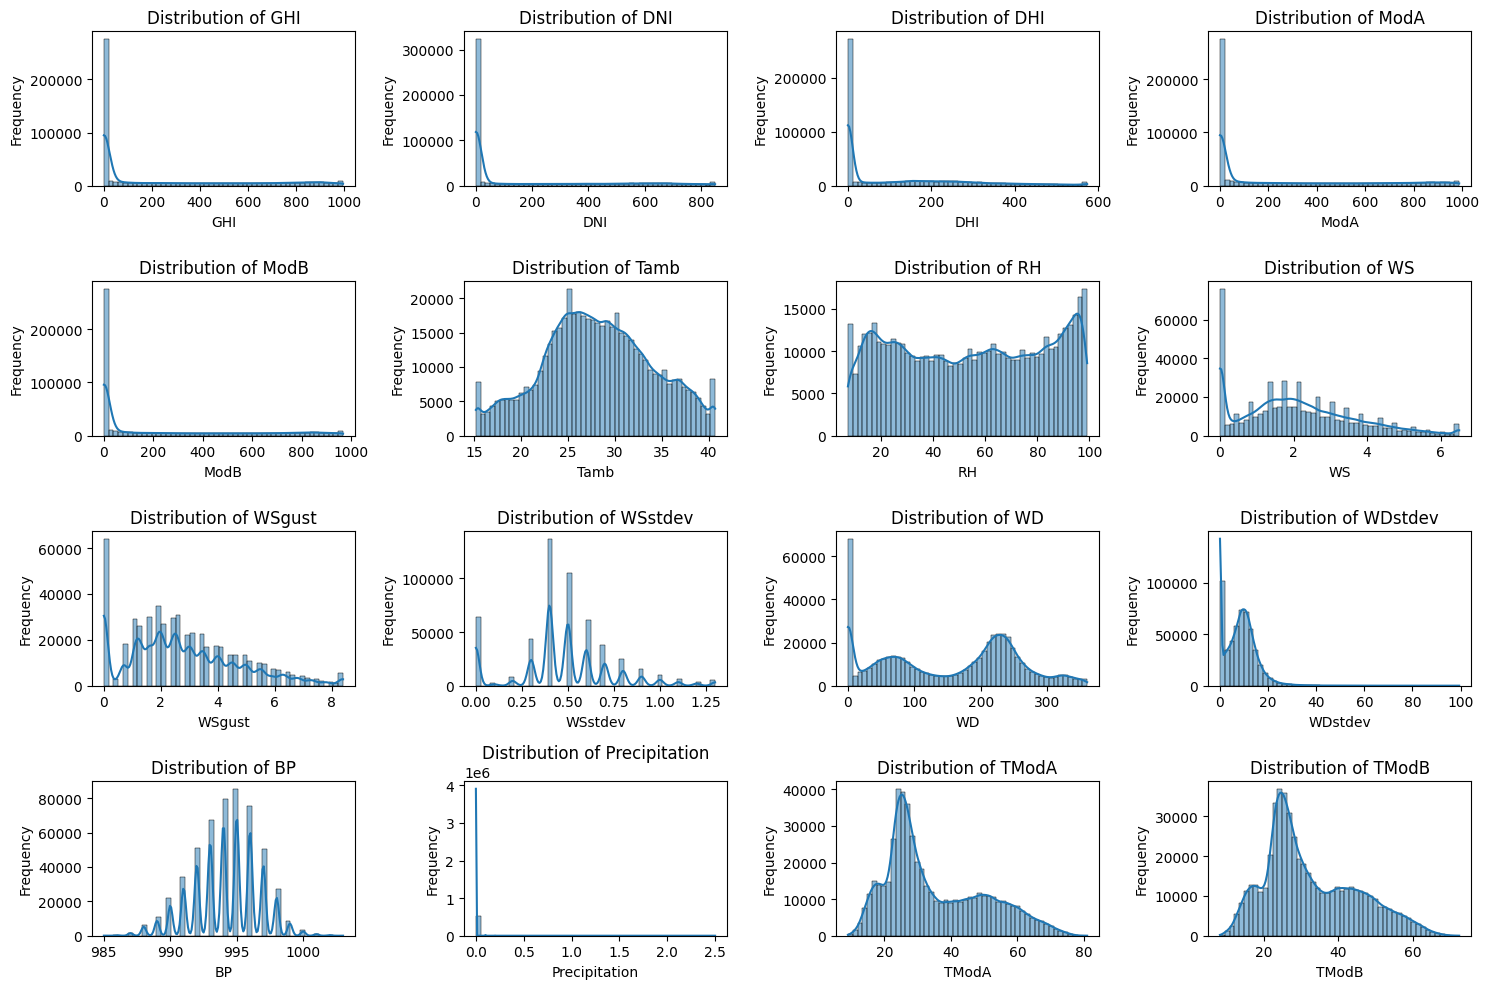

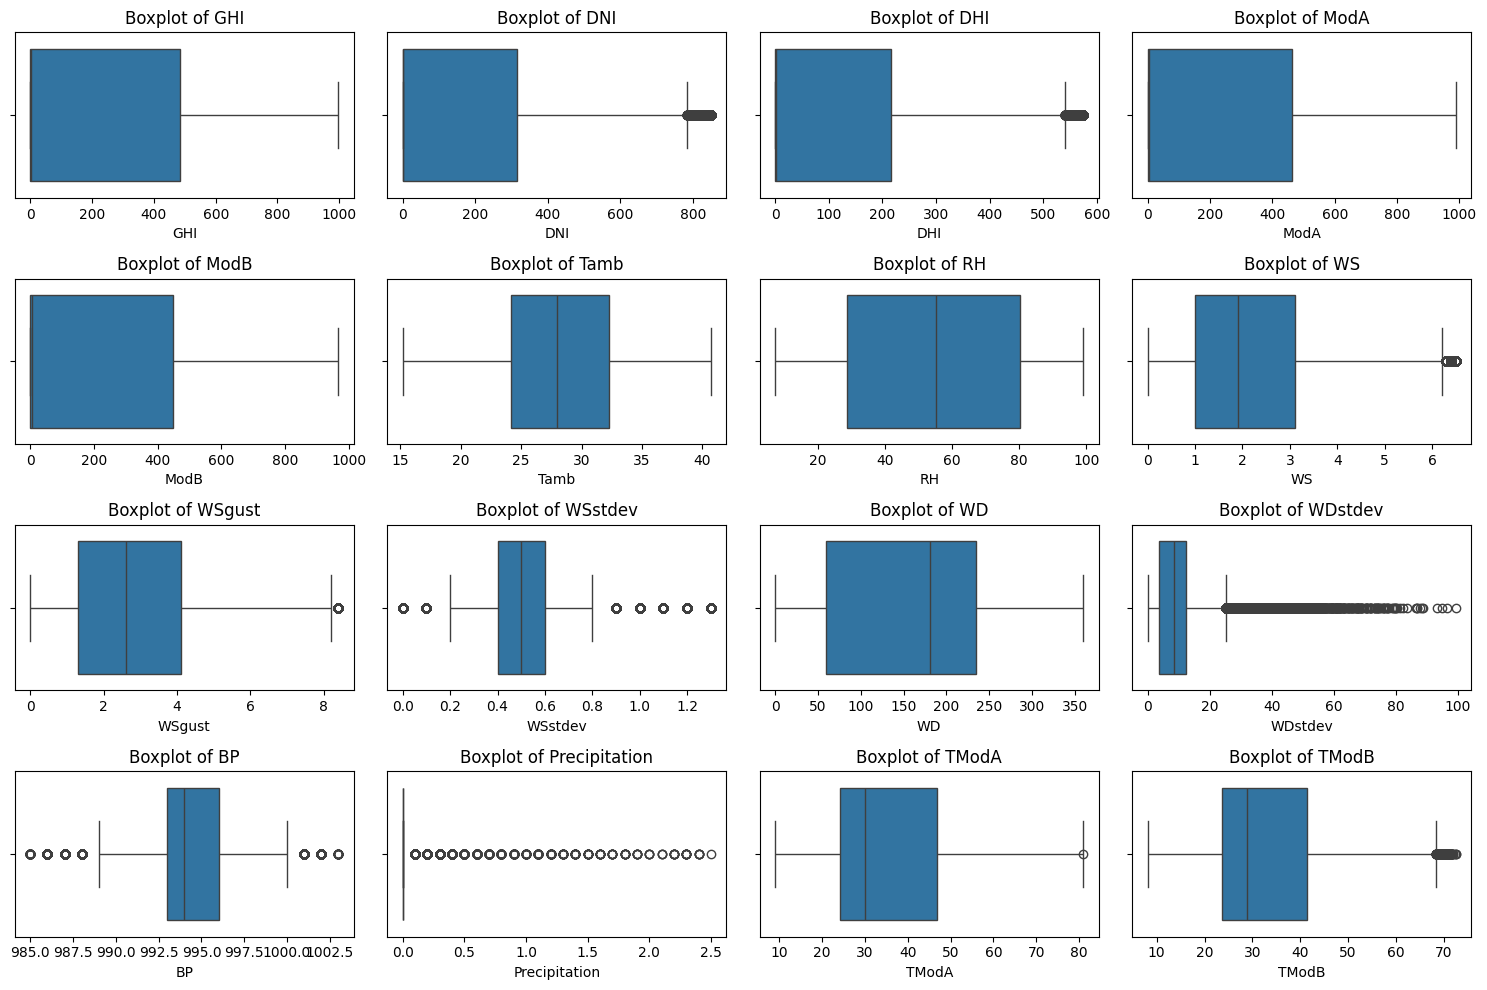

In [93]:
# Histograms
plt.figure(figsize=(15, 10))
columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Precipitation', 'TModA', 'TModB']
for i, col in enumerate(columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(bm[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=bm[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

Normalization (Scaling features to a range of [0, 1]):

In [65]:
scaler = MinMaxScaler()
bm_normalized = bm.copy()
bm_normalized[columns_of_interest] = scaler.fit_transform(bm[columns_of_interest])

Standardization (Scaling features to have a mean of 0 and a standard deviation of 1):

In [67]:
scaler = StandardScaler()
bm_standardized = bm.copy()
bm_standardized[columns_of_interest] = scaler.fit_transform(bm[columns_of_interest])

In [69]:
print(bm_standardized.describe())

                GHI           DNI           DHI          ModA          ModB  \
count  5.256000e+05  5.256000e+05  5.256000e+05  5.256000e+05  5.256000e+05   
mean  -7.462321e-17 -2.617220e-16 -3.276932e-16  1.979137e-17  4.266501e-17   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -7.344330e-01 -6.409069e-01 -7.463958e-01 -7.245905e-01 -7.241832e-01   
25%   -7.344330e-01 -6.409069e-01 -7.463958e-01 -7.245905e-01 -7.241832e-01   
50%   -7.289562e-01 -6.409069e-01 -7.361527e-01 -7.107877e-01 -7.105525e-01   
75%    7.364018e-01  5.635807e-01  6.383401e-01  6.977147e-01  6.956330e-01   
max    2.299126e+00  2.617573e+00  2.929588e+00  2.305898e+00  2.344319e+00   

               Tamb            RH            WS        WSgust       WSstdev  \
count  5.256000e+05  5.256000e+05  5.256000e+05  5.256000e+05  5.256000e+05   
mean   2.369774e-15 -2.271141e-16 -3.670597e-16 -1.103126e-17  1.574658e-16   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.

#### Histograms

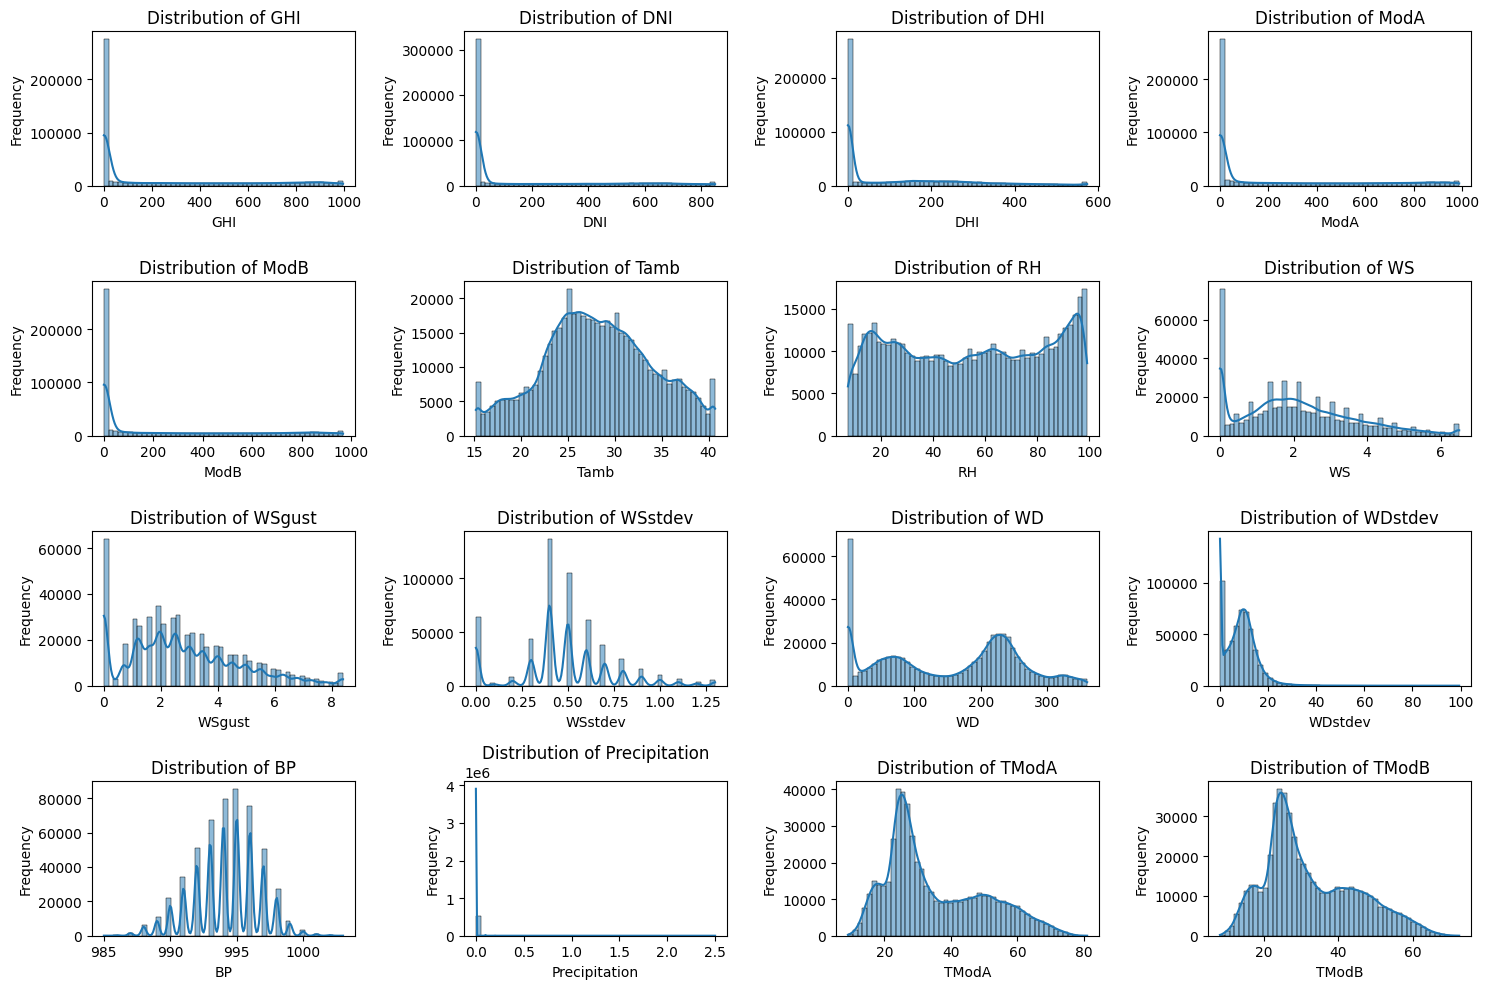

In [71]:
plt.figure(figsize=(15, 10))
columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Precipitation', 'TModA', 'TModB']
for i, col in enumerate(columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(bm[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### Correlation Analysis

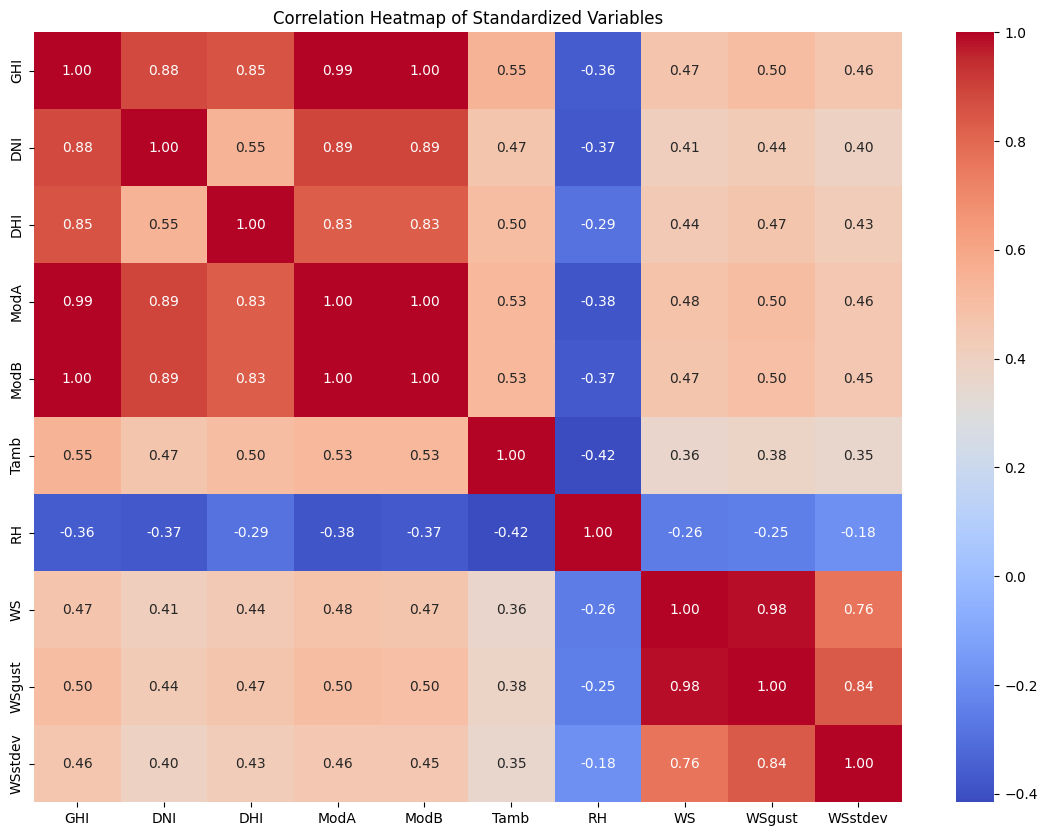

In [74]:
plt.figure(figsize=(14, 10))
sns.heatmap(bm_standardized[columns_of_interest].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Standardized Variables')
plt.show()

#### Wind Analysis

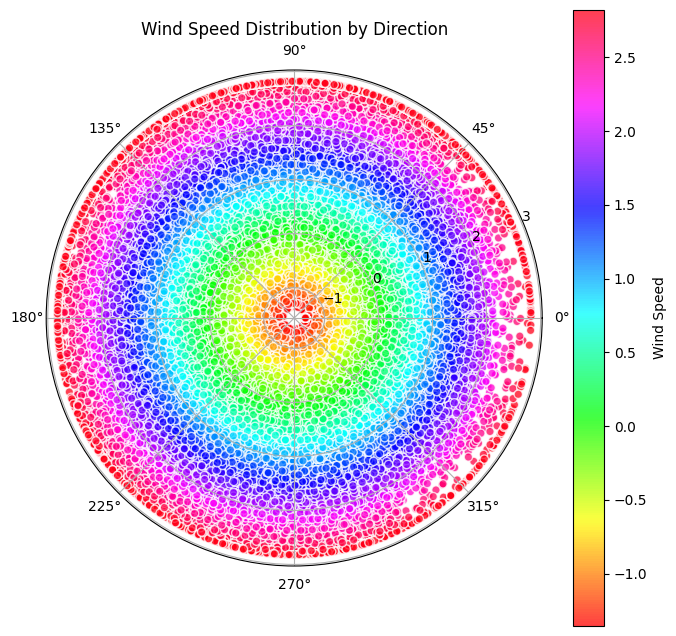

In [75]:
# Convert wind direction from degrees to radians
wind_direction_rad = np.deg2rad(bm_standardized['WD'])

# Polar plot for wind speed
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')
c = ax.scatter(wind_direction_rad, bm_standardized['WS'], c=bm_standardized['WS'], cmap='hsv', alpha=0.75, edgecolors='w')
ax.set_title('Wind Speed Distribution by Direction')
plt.colorbar(c, label='Wind Speed')
plt.show()

#### Temperature and Humidity Analysis

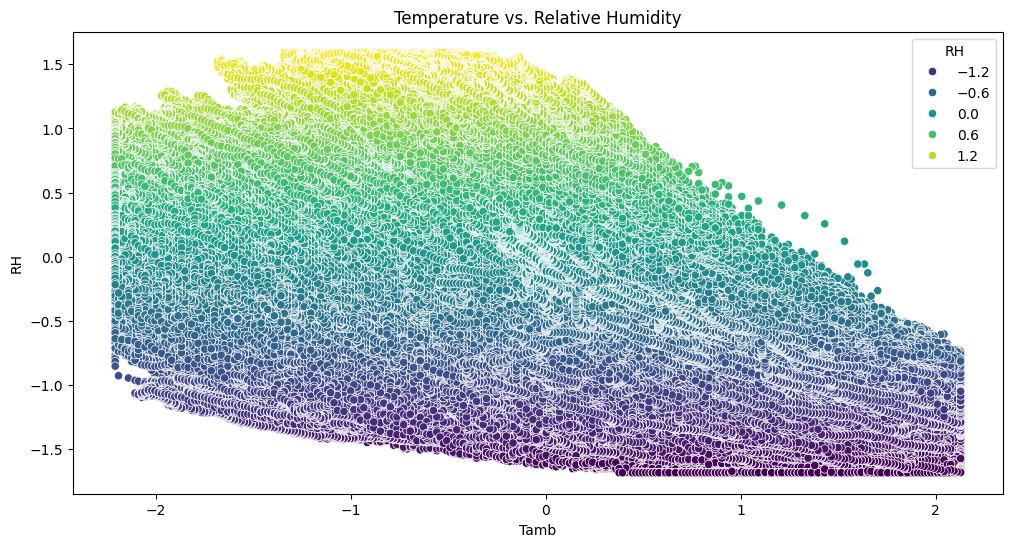

In [76]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=bm_standardized, x='Tamb', y='RH', hue='RH', palette='viridis')
plt.title('Temperature vs. Relative Humidity')
plt.show()

#### Temperature vs. Solar Radiation

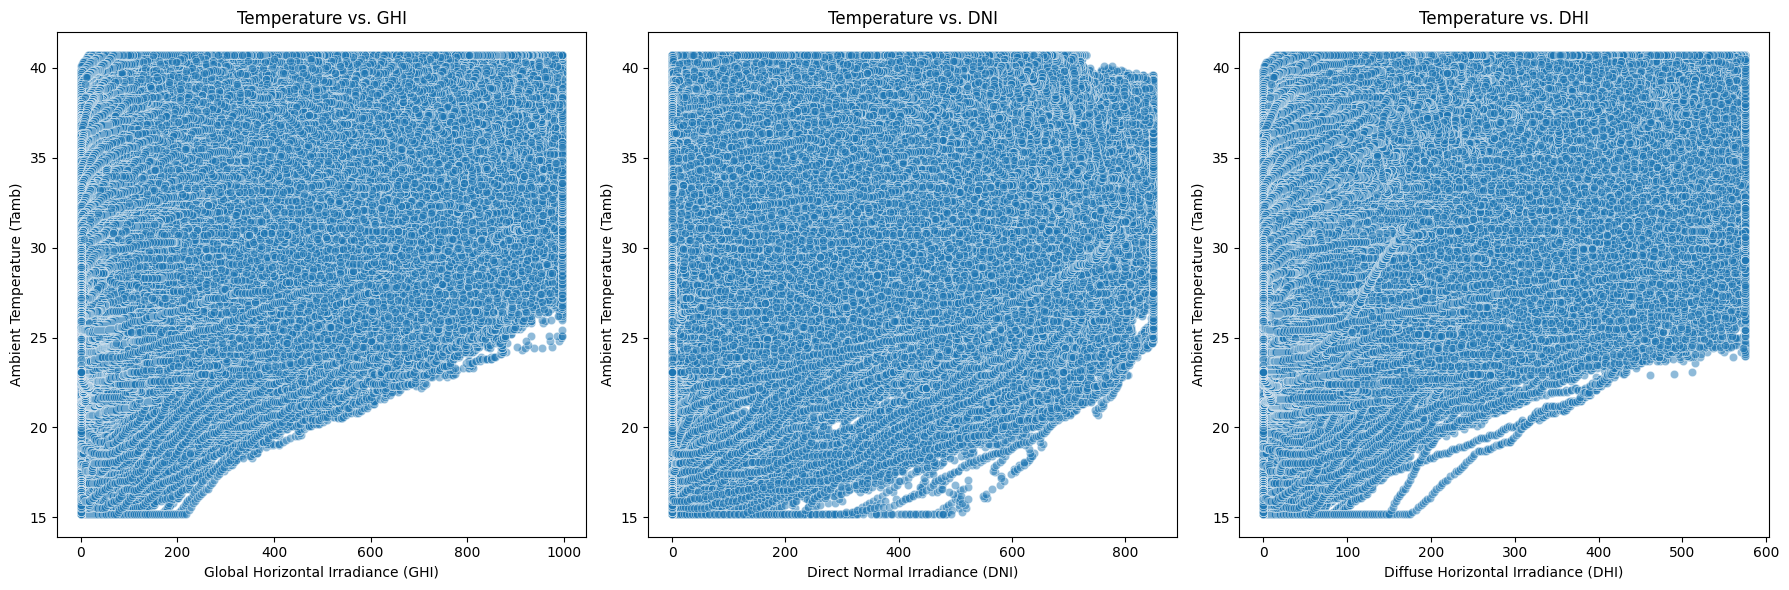

In [84]:
plt.figure(figsize=(18, 6))

# Plot temperature vs. GHI
plt.subplot(1, 3, 1)
sns.scatterplot(x='GHI', y='Tamb', data=bm, alpha=0.5)
plt.title('Temperature vs. GHI')
plt.xlabel('Global Horizontal Irradiance (GHI)')
plt.ylabel('Ambient Temperature (Tamb)')

# Plot temperature vs. DNI
plt.subplot(1, 3, 2)
sns.scatterplot(x='DNI', y='Tamb', data=bm, alpha=0.5)
plt.title('Temperature vs. DNI')
plt.xlabel('Direct Normal Irradiance (DNI)')
plt.ylabel('Ambient Temperature (Tamb)')

# Plot temperature vs. DHI
plt.subplot(1, 3, 3)
sns.scatterplot(x='DHI', y='Tamb', data=bm, alpha=0.5)
plt.title('Temperature vs. DHI')
plt.xlabel('Diffuse Horizontal Irradiance (DHI)')
plt.ylabel('Ambient Temperature (Tamb)')

plt.tight_layout()
plt.show()


#### wind analysis

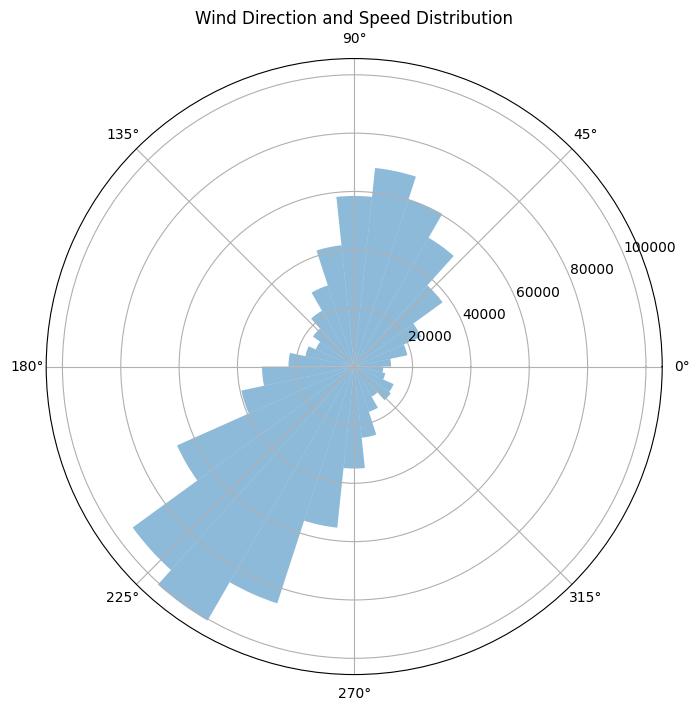

In [86]:
# Polar plot for wind direction and speed
plt.figure(figsize=(10, 8))
ax = plt.subplot(111, projection='polar')
ax.hist(np.deg2rad(bm['WD']), bins=30, weights=bm['WS'], alpha=0.5)
plt.title('Wind Direction and Speed Distribution')
plt.show()

Bubble chart

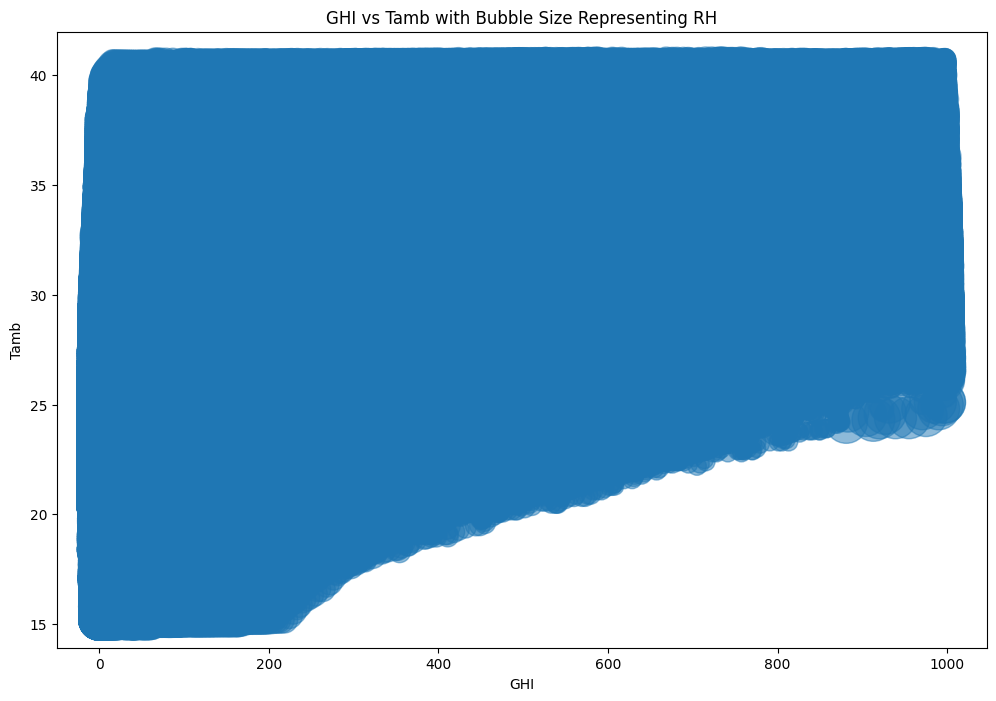

In [87]:
plt.figure(figsize=(12, 8))
plt.scatter(bm['GHI'], bm['Tamb'], s=bm['RH']*10, alpha=0.5)
plt.title('GHI vs Tamb with Bubble Size Representing RH')
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.show()

Z-Score Analysis

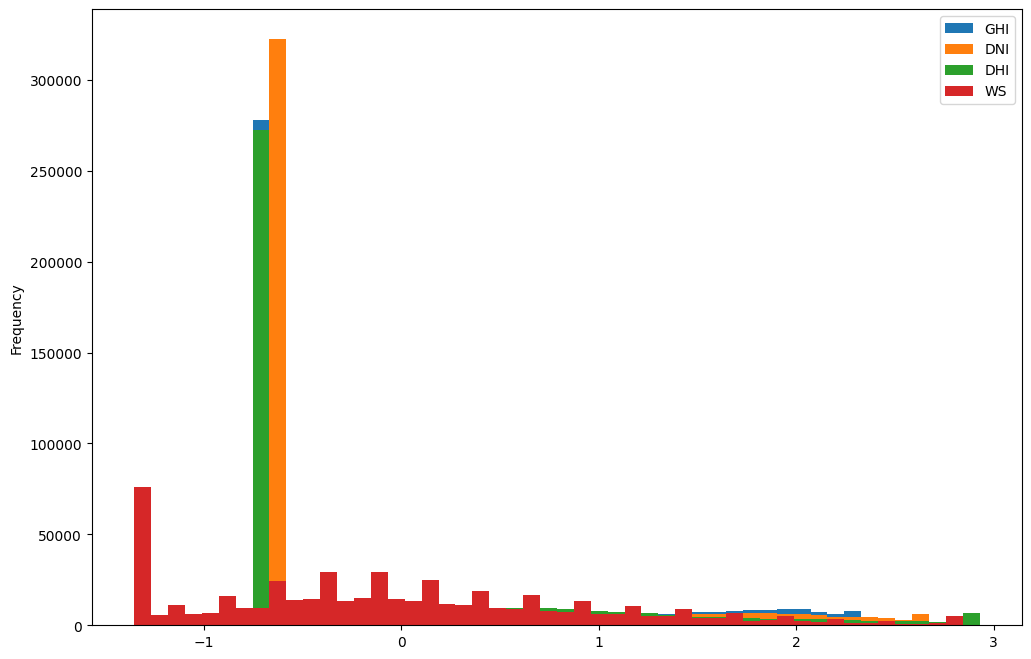

In [90]:
bm[['GHI', 'DNI', 'DHI', 'WS']].apply(zscore).plot(kind='hist', bins=50, figsize=(12, 8))
plt.show()